<a href="https://colab.research.google.com/github/PrathamSachan91/Customer_Churn_Prediction/blob/main/colab_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

**2. Data Loading and Understanding**

In [ ]:
# load teh csv data to a pandas dataframe
download_url = f"https://drive.google.com/uc?id=1mjx6tl9MD08uYt_CPWygESL-AOt6avuh"
df=pd.read_csv(download_url)

In [ ]:
df.shape

(440833, 12)

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.head(2)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["CustomerID"])

In [ ]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [ ]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
print(df["Gender"].unique())

['Female' 'Male' nan]


In [ ]:
# printing the unique values in all the columns

numerical_features_list = ["Last Interaction", "Payment Delay", "Tenure","Usage Frequency",	"Support Calls"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

Age [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]
--------------------------------------------------
Gender ['Female' 'Male' nan]
--------------------------------------------------
Subscription Type ['Standard' 'Basic' 'Premium' nan]
--------------------------------------------------
Contract Length ['Annual' 'Monthly' 'Quarterly' nan]
--------------------------------------------------
Total Spend [932.   557.   185.   ... 829.59 804.3  959.47]
--------------------------------------------------
Churn [ 1.  0. nan]
--------------------------------------------------


In [ ]:
print(df.isnull().sum())

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-14-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print(df.isna().sum())

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
df[df["Support Calls"]==10.0]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
12,22.0,Male,41.0,17.0,10.0,25.0,Basic,Quarterly,265.00,23.0,1.0
30,56.0,Female,59.0,5.0,10.0,27.0,Standard,Quarterly,424.00,2.0,1.0
36,25.0,Female,53.0,2.0,10.0,13.0,Basic,Quarterly,336.00,13.0,1.0
38,51.0,Male,30.0,4.0,10.0,29.0,Premium,Monthly,770.00,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
253570,48.0,Female,4.0,5.0,10.0,13.0,Premium,Quarterly,935.74,17.0,1.0
253584,26.0,Female,17.0,1.0,10.0,30.0,Basic,Monthly,629.11,6.0,1.0
253637,49.0,Female,52.0,13.0,10.0,2.0,Premium,Monthly,495.13,7.0,1.0
253655,63.0,Male,58.0,12.0,10.0,30.0,Basic,Quarterly,368.72,18.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440833 non-null  float64
 1   Gender             440833 non-null  object 
 2   Tenure             440833 non-null  float64
 3   Usage Frequency    440833 non-null  float64
 4   Support Calls      440833 non-null  float64
 5   Payment Delay      440833 non-null  float64
 6   Subscription Type  440833 non-null  object 
 7   Contract Length    440833 non-null  object 
 8   Total Spend        440833 non-null  float64
 9   Last Interaction   440833 non-null  float64
 10  Churn              440833 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [ ]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
1.0    250000
0.0    190833
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(440833, 11)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [ ]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000,440833.000000
mean,39.373148,31.256335,15.807465,3.604451,12.965733,631.615661,14.480867,0.567108
std,12.442356,17.255708,8.586254,3.070230,8.258057,240.803017,8.596198,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [ ]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

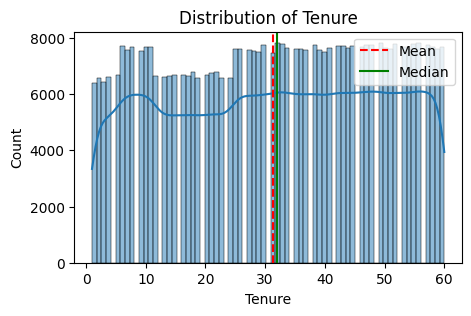

In [ ]:
plot_histogram(df, "Tenure")

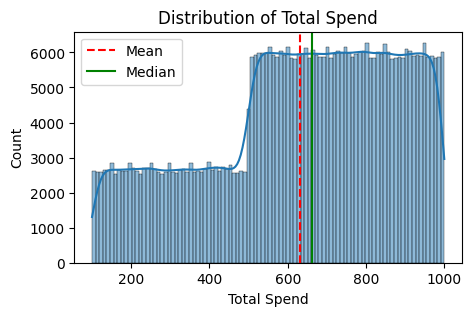

In [ ]:
plot_histogram(df, "Total Spend")

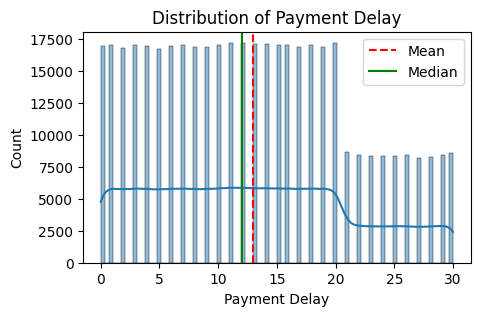

In [ ]:
plot_histogram(df, "Payment Delay")

**Box plot for numerical features**

In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

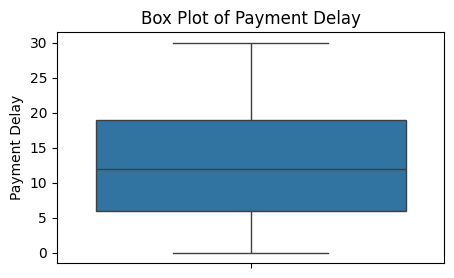

In [ ]:
plot_boxplot(df, "Payment Delay")

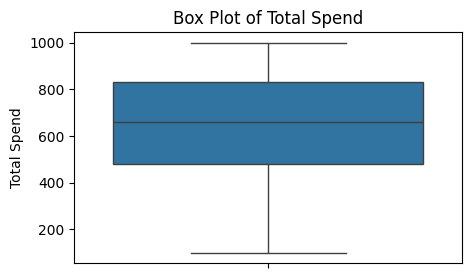

In [ ]:
plot_boxplot(df, "Total Spend")

**Correlation Heatmap for numerical columns**

In [ ]:
df_encoded = df.copy()
label_encoders = {}
for col in ['Gender', 'Subscription Type', 'Contract Length']:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

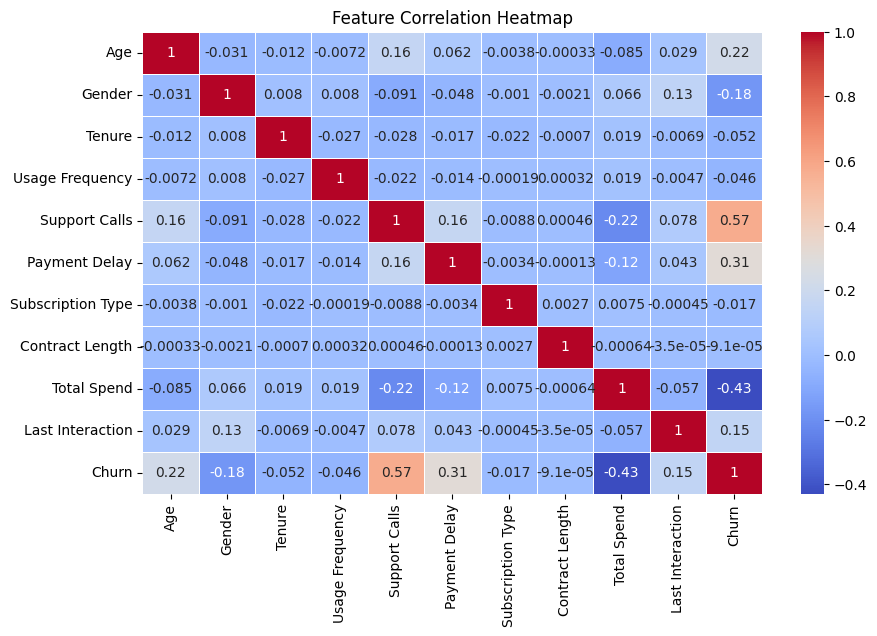

In [ ]:
# correlation matrix - heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [ ]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440833 non-null  float64
 1   Gender             440833 non-null  object 
 2   Tenure             440833 non-null  float64
 3   Usage Frequency    440833 non-null  float64
 4   Support Calls      440833 non-null  float64
 5   Payment Delay      440833 non-null  float64
 6   Subscription Type  440833 non-null  object 
 7   Contract Length    440833 non-null  object 
 8   Total Spend        440833 non-null  float64
 9   Last Interaction   440833 non-null  float64
 10  Churn              440833 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


**4. Data Preprocessing**

In [ ]:
df.head(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0


Label encoding of target column

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [ ]:
df.head(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0


In [ ]:
print(df["Churn"].value_counts())

Churn
1.0    250000
0.0    190833
Name: count, dtype: int64


Label encoding of categorical fetaures

In [ ]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [ ]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [ ]:
encoders

{'Gender': LabelEncoder(),
 'Subscription Type': LabelEncoder(),
 'Contract Length': LabelEncoder()}

In [ ]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


**Traianing and test data split**

In [ ]:
# Selecting only numeric columns for scaling
numeric_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                   'Payment Delay', 'Total Spend', 'Last Interaction']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


        Age  Gender    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 -0.753327       0  0.448760        -0.210507       0.454543       0.609620   
1  2.059649       0  1.028279        -1.724557       2.083087      -0.601320   
2  1.255941       0 -1.000037        -1.375161       0.780252       0.609620   
3  1.497054       1  0.390808         0.604751       1.105961      -0.722414   
4 -1.315922       1  0.043097         0.488285       0.454543      -0.601320   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  2                0     1.247429          0.293052    1.0  
1                  0                1    -0.309862         -0.986585    1.0  
2                  0                2    -1.854695         -1.335576    1.0  
3                  2                1    -0.978459          1.689020    1.0  
4                  0                1    -0.060696          0.642044    1.0  


In [ ]:
X, y = df.drop(columns=["Churn"]), df["Churn"]

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution
print(pd.Series(y_resampled).value_counts())

Churn
1.0    250000
0.0    250000
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(352666, 10) (88167, 10)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.85
Confusion Matrix:
 [[32472  5671]
 [ 7316 42708]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     38143
         1.0       0.88      0.85      0.87     50024

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
with open("churn_model.pkl", "wb") as f:
    pickle.dump(dt, f)

Decision Tree Accuracy: 0.9997844998695657
Confusion Matrix:
 [[38139     4]
 [   15 50009]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38143
         1.0       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9996937629725408
Confusion Matrix:
 [[38142     1]
 [   26 49998]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38143
         1.0       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:08:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9999206052151032
Confusion Matrix:
 [[38143     0]
 [    7 50017]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38143
         1.0       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

with open("encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("churn_model.pkl", "rb") as f:
    dt = pickle.load(f)

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Raw input
custom_input = {
    "Age": 19,
    "Gender": "Male",
    "Tenure": 23,
    "Usage Frequency": 30,
    "Support Calls": 1,
    "Payment Delay": 15,
    "Subscription Type": "Premium",
    "Contract Length": "Quarterly",
    "Total Spend": 903.24,
    "Last Interaction": 17
}

# Encode categorical inputs using pre-trained encoders
for col in categorical_cols:
    custom_input[col] = label_encoders[col].transform([custom_input[col]])[0]

# Convert to DataFrame
custom_input_df = pd.DataFrame([custom_input])

# Scale numerical features using pre-trained scaler
custom_input_df[numerical_cols] = scaler.transform(custom_input_df[numerical_cols])

# Ensure column order matches training data
custom_input_df = custom_input_df[dt.feature_names_in_]

# Make prediction
predicted_churn = dt.predict(custom_input_df)[0]

# Output result
print("Custom Input:", custom_input)
print("Predicted Churn:", "Yes" if predicted_churn == 1 else "No")


Custom Input: {'Age': 19, 'Gender': 1, 'Tenure': 23, 'Usage Frequency': 30, 'Support Calls': 1, 'Payment Delay': 15, 'Subscription Type': 1, 'Contract Length': 2, 'Total Spend': 903.24, 'Last Interaction': 17}
Predicted Churn: No
